<a href="https://colab.research.google.com/github/ChoiSenn/Study/blob/main/data_analysis/exercise/2023_10_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

file_path = "/content/drive/MyDrive/bigdata/dust.xlsx"
dust = pd.read_excel(file_path)

dust.head()

,날짜,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
0,2022-10-01 01,0.003,0.7,0.012,0.063,55.0,37.0
1,2022-10-01 02,0.003,0.6,0.018,0.048,53.0,38.0
2,2022-10-01 03,0.003,0.5,0.026,0.033,51.0,36.0
3,2022-10-01 04,0.003,0.5,0.024,0.030,44.0,30.0
4,2022-10-01 05,0.003,0.5,0.024,0.028,43.0,31.0


In [4]:
dust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      744 non-null    object 
 1   아황산가스   740 non-null    float64
 2   일산화탄소   740 non-null    float64
 3   오존      740 non-null    float64
 4   이산화질소   740 non-null    float64
 5   PM10    740 non-null    float64
 6   PM2.5   740 non-null    float64
dtypes: float64(6), object(1)
memory usage: 40.8+ KB


In [5]:
dust.describe()

,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,0.003112,0.372162,0.024166,0.023949,25.682432,13.947297
std,0.000485,0.131745,0.015882,0.012784,13.927046,10.006422
min,0.002000,0.200000,0.003000,0.006000,4.000000,1.000000
25%,0.003000,0.300000,0.012000,0.014000,16.000000,7.000000
50%,0.003000,0.300000,0.024000,0.022000,23.000000,11.000000
75%,0.003000,0.400000,0.033000,0.032000,33.000000,18.000000
max,0.006000,0.900000,0.105000,0.075000,84.000000,60.000000


In [6]:
dust.rename(columns = {'날짜': 'date', '아황산가스' : 'so2', '일산화탄소' : 'co', '오존' : 'o3', '이산화질소' : 'no2'}, inplace=True)
dust.head()

,date,so2,co,o3,no2,PM10,PM2.5
0,2022-10-01 01,0.003,0.7,0.012,0.063,55.0,37.0
1,2022-10-01 02,0.003,0.6,0.018,0.048,53.0,38.0
2,2022-10-01 03,0.003,0.5,0.026,0.033,51.0,36.0
3,2022-10-01 04,0.003,0.5,0.024,0.030,44.0,30.0
4,2022-10-01 05,0.003,0.5,0.024,0.028,43.0,31.0


In [8]:
dust['date'] = dust['date'].str[:11]
dust.head()

,date,so2,co,o3,no2,PM10,PM2.5
0,2022-10-01,0.003,0.7,0.012,0.063,55.0,37.0
1,2022-10-01,0.003,0.6,0.018,0.048,53.0,38.0
2,2022-10-01,0.003,0.5,0.026,0.033,51.0,36.0
3,2022-10-01,0.003,0.5,0.024,0.030,44.0,30.0
4,2022-10-01,0.003,0.5,0.024,0.028,43.0,31.0


In [9]:
dust['date'] = pd.to_datetime(dust['date'])
dust.dtypes

date     datetime64[ns]
so2             float64
co              float64
o3              float64
no2             float64
PM10            float64
PM2.5           float64
dtype: object

In [10]:
dust['year'] = dust['date'].dt.year
dust['month'] = dust['date'].dt.month
dust['day'] = dust['date'].dt.day
dust.columns

Index(['date', 'so2', 'co', 'o3', 'no2', 'PM10', 'PM2.5', 'year', 'month',
       'day'],
      dtype='object')

In [11]:
dust = dust[['date', 'year', 'month', 'day', 'so2', 'co', 'o3', 'no2', 'PM10', 'PM2.5']]
dust.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
0,2022-10-01,2022,10,1,0.003,0.7,0.012,0.063,55.0,37.0
1,2022-10-01,2022,10,1,0.003,0.6,0.018,0.048,53.0,38.0
2,2022-10-01,2022,10,1,0.003,0.5,0.026,0.033,51.0,36.0
3,2022-10-01,2022,10,1,0.003,0.5,0.024,0.030,44.0,30.0
4,2022-10-01,2022,10,1,0.003,0.5,0.024,0.028,43.0,31.0


In [12]:
dust.isnull().sum()

date     0
year     0
month    0
day      0
so2      4
co       4
o3       4
no2      4
PM10     4
PM2.5    4
dtype: int64

In [13]:
dust = dust.fillna(method='pad')

In [14]:
dust.isnull().sum()

date     0
year     0
month    0
day      0
so2      0
co       0
o3       0
no2      0
PM10     0
PM2.5    0
dtype: int64

In [15]:
dust.fillna(20, inplace=True)
dust.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5
0,2022-10-01,2022,10,1,0.003,0.7,0.012,0.063,55.0,37.0
1,2022-10-01,2022,10,1,0.003,0.6,0.018,0.048,53.0,38.0
2,2022-10-01,2022,10,1,0.003,0.5,0.026,0.033,51.0,36.0
3,2022-10-01,2022,10,1,0.003,0.5,0.024,0.030,44.0,30.0
4,2022-10-01,2022,10,1,0.003,0.5,0.024,0.028,43.0,31.0


In [36]:
file_path = '/content/drive/MyDrive/bigdata/weather.xlsx'
weather = pd.read_excel(file_path)
weather.head()

,지점,지점명,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,400,강남,2022-10-01 01:00:00,17.2,0.1,0.0,96
1,400,강남,2022-10-01 02:00:00,16.3,0.0,0.0,96
2,400,강남,2022-10-01 03:00:00,16.0,0.0,0.0,96
3,400,강남,2022-10-01 04:00:00,15.5,0.1,0.0,96
4,400,강남,2022-10-01 05:00:00,15.3,0.4,0.0,97


In [37]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지점       720 non-null    int64         
 1   지점명      720 non-null    object        
 2   일시       720 non-null    datetime64[ns]
 3   기온(°C)   720 non-null    float64       
 4   풍속(m/s)  679 non-null    float64       
 5   강수량(mm)  720 non-null    float64       
 6   습도(%)    720 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 39.5+ KB


In [38]:
weather.drop('지점', axis=1, inplace=True)
weather.drop('지점명', axis=1, inplace=True)
weather.head()

,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,2022-10-01 01:00:00,17.2,0.1,0.0,96
1,2022-10-01 02:00:00,16.3,0.0,0.0,96
2,2022-10-01 03:00:00,16.0,0.0,0.0,96
3,2022-10-01 04:00:00,15.5,0.1,0.0,96
4,2022-10-01 05:00:00,15.3,0.4,0.0,97


In [39]:
weather.columns = ['date', 'temp', 'wind', 'rain', 'humid']
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    720 non-null    datetime64[ns]
 1   temp    720 non-null    float64       
 2   wind    679 non-null    float64       
 3   rain    720 non-null    float64       
 4   humid   720 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 28.2 KB


In [40]:
weather.isnull().sum()

date      0
temp      0
wind     41
rain      0
humid     0
dtype: int64

In [41]:
weather = weather.fillna(method='pad')
weather.isnull().sum()

date     0
temp     0
wind     0
rain     0
humid    0
dtype: int64

In [45]:
weather['date'] = pd.to_datetime(weather['date']).dt.date
weather['date'] = pd.to_datetime(weather['date'])
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    720 non-null    datetime64[ns]
 1   temp    720 non-null    float64       
 2   wind    720 non-null    float64       
 3   rain    720 non-null    float64       
 4   humid   720 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 28.2 KB


In [48]:
weather['rain'] = weather['rain'].replace([0], 0.01)
weather['rain'].value_counts()

0.1     673
0.5      15
2.0       6
1.5       6
2.5       6
1.0       4
4.0       2
5.5       2
3.0       1
5.0       1
3.5       1
12.0      1
6.0       1
6.5       1
Name: rain, dtype: int64

In [50]:
dust.shape

(744, 10)

In [51]:
weather.shape

(720, 5)

In [82]:
#dust.drop(index = 743, inplace=True)

In [81]:
dust.shape

(720, 10)

In [83]:
df = pd.merge(dust, weather, on = 'date')
df.head()

,date,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
0,2022-10-01,2022,10,1,0.003,0.7,0.012,0.063,55.0,37.0,17.2,0.1,0.1,96
1,2022-10-01,2022,10,1,0.003,0.7,0.012,0.063,55.0,37.0,16.3,0.0,0.1,96
2,2022-10-01,2022,10,1,0.003,0.7,0.012,0.063,55.0,37.0,16.0,0.0,0.1,96
3,2022-10-01,2022,10,1,0.003,0.7,0.012,0.063,55.0,37.0,15.5,0.1,0.1,96
4,2022-10-01,2022,10,1,0.003,0.7,0.012,0.063,55.0,37.0,15.3,0.4,0.1,97


In [84]:
df.corr()

<ipython-input-84-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,month,day,so2,co,o3,no2,PM10,PM2.5,temp,wind,rain,humid
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,NaN,NaN,1.000000,0.131653,0.211251,-0.119657,0.292105,0.242141,0.169509,-0.435434,-0.261069,-0.234965,-0.188210
so2,NaN,NaN,0.131653,1.000000,0.458139,0.244320,0.401982,0.545997,0.521436,0.018198,-0.084660,-0.049229,0.002565
co,NaN,NaN,0.211251,0.458139,1.000000,-0.142009,0.815399,0.805628,0.812767,0.071117,-0.221681,-0.068747,0.062146
o3,NaN,NaN,-0.119657,0.244320,-0.142009,1.000000,-0.324264,0.193746,0.189400,0.087792,0.088702,0.001272,-0.019833
no2,NaN,NaN,0.292105,0.401982,0.815399,-0.324264,1.000000,0.620009,0.635592,0.014696,-0.343531,-0.109497,0.081381
PM10,NaN,NaN,0.242141,0.545997,0.805628,0.193746,0.620009,1.000000,0.961303,0.098083,-0.153535,-0.084205,-0.005457
PM2.5,NaN,NaN,0.169509,0.521436,0.812767,0.189400,0.635592,0.961303,1.000000,0.151272,-0.188914,-0.067195,0.057624
temp,NaN,NaN,-0.435434,0.018198,0.071117,0.087792,0.014696,0.098083,0.151272,1.000000,0.257197,0.183505,-0.300002


In [85]:
corr = df.corr()
corr
corr['PM10'].sort_values(ascending=False)

<ipython-input-85-a79beb9d6da8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


PM10     1.000000
PM2.5    0.961303
co       0.805628
no2      0.620009
so2      0.545997
day      0.242141
o3       0.193746
temp     0.098083
humid   -0.005457
rain    -0.084205
wind    -0.153535
year          NaN
month         NaN
Name: PM10, dtype: float64

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'so2'}>, <Axes: title={'center': 'co'}>,
        <Axes: title={'center': 'o3'}>, <Axes: title={'center': 'no2'}>],
       [<Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'humid'}>, <Axes: >, <Axes: >]],
      dtype=object)

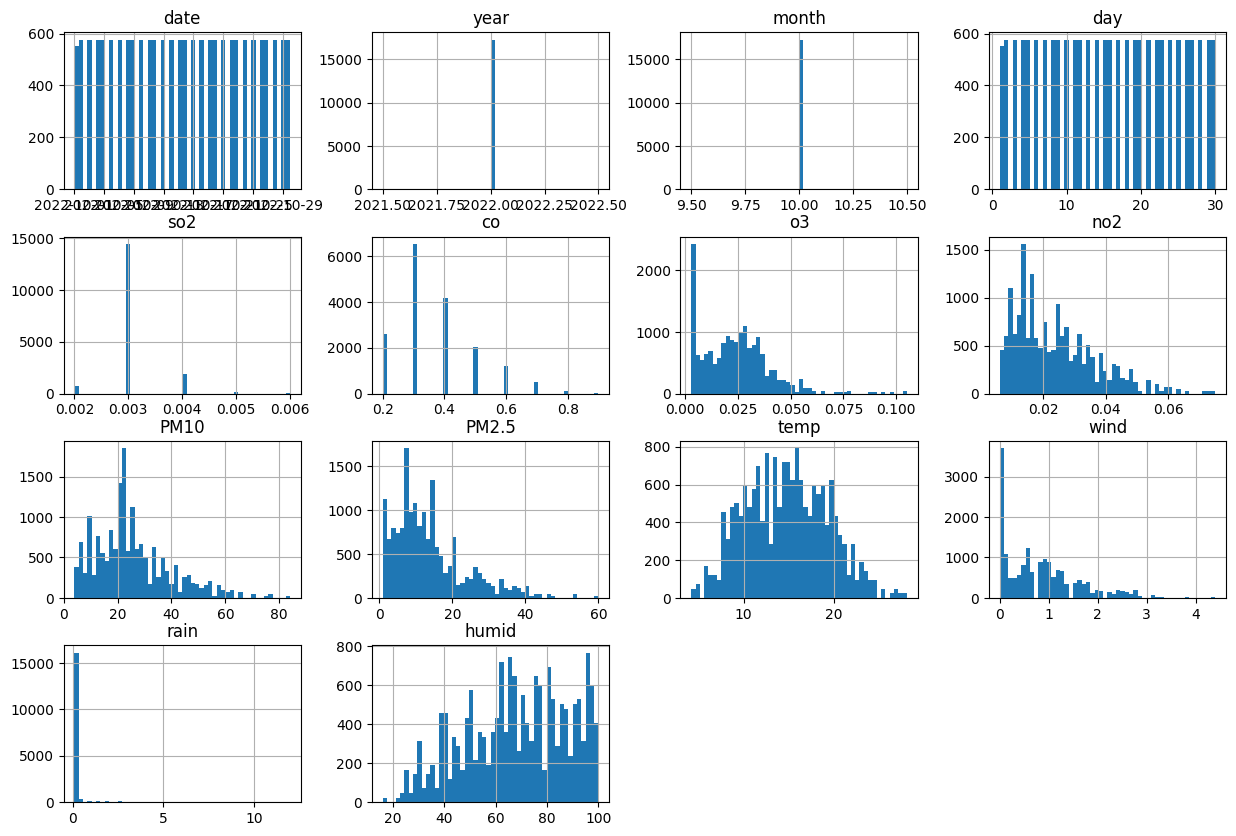

In [88]:
df.hist(bins=50, figsize=(15, 10))

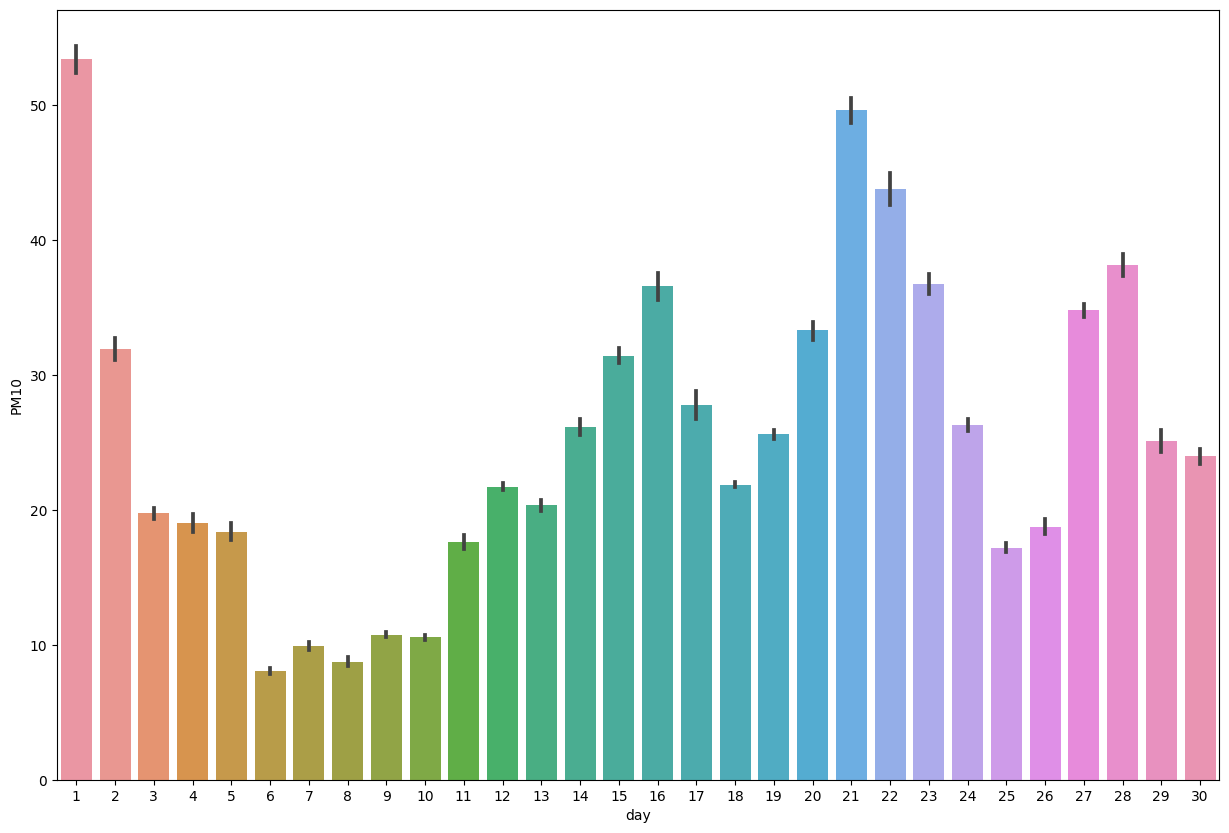

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (15, 10))
dayGraph = sns.barplot(x = 'day', y = 'PM10', data = df)
plt.xticks(rotation = 0)
plt.show()

<Axes: >

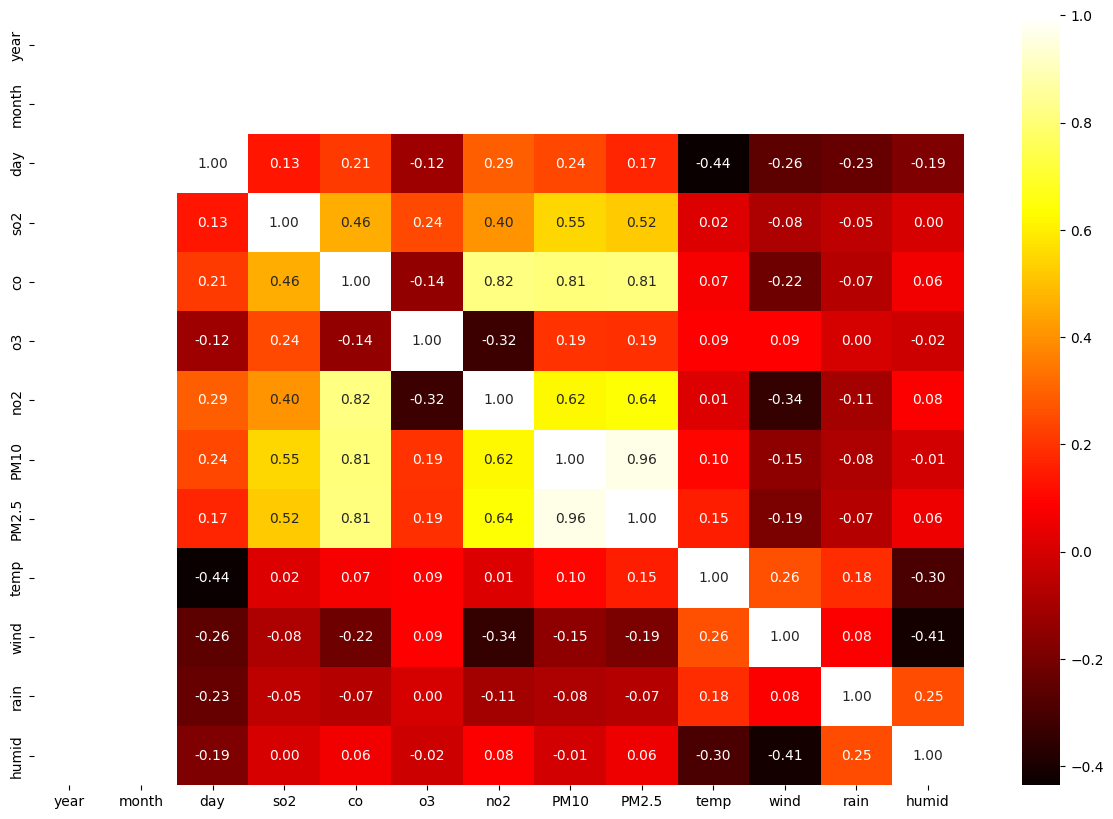

In [90]:
plt.figure(figsize=(15, 10))
sns.heatmap(data = corr, annot = True, fmt = '.2f', cmap = 'hot')

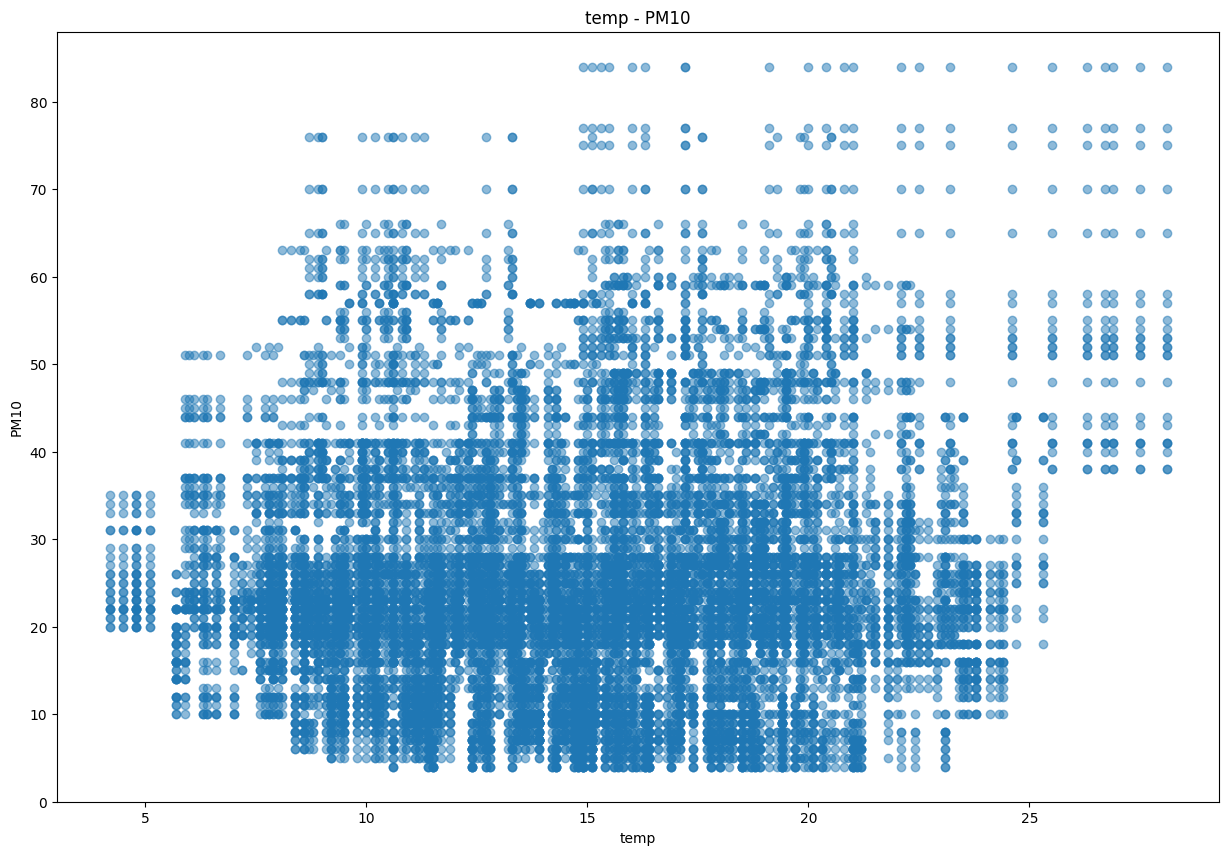

In [95]:
plt.figure(figsize=(15, 10))
x = df['temp']
y = df['PM10']
plt.plot(x, y, marker='o', linestyle='none', alpha=0.5)
plt.title("temp - PM10")
plt.xlabel('temp')
plt.ylabel('PM10')
plt.show()

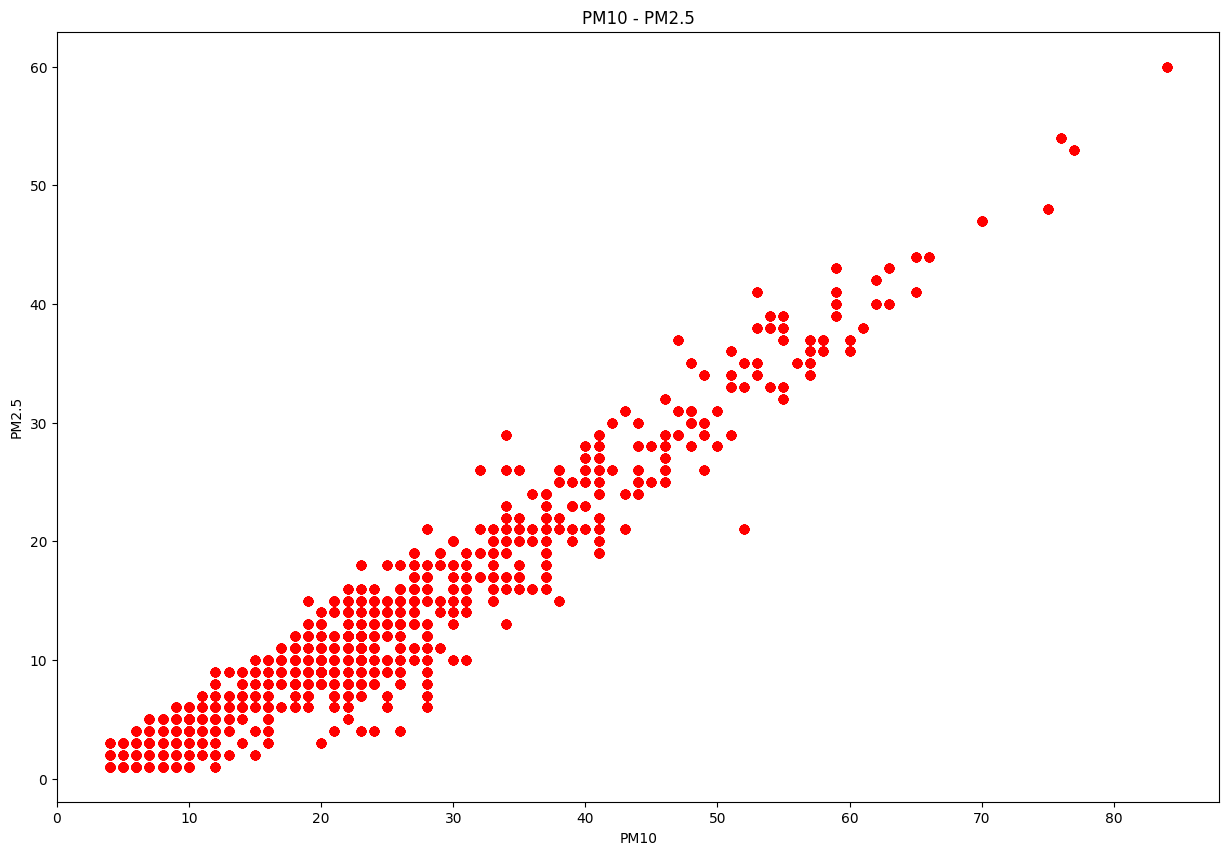

In [97]:
plt.figure(figsize=(15, 10))
x = df['PM10']
y = df['PM2.5']
plt.plot(x, y, marker='o', linestyle='none', color='red', alpha=0.5)
plt.title("PM10 - PM2.5")
plt.xlabel('PM10')
plt.ylabel('PM2.5')
plt.show()